# Linear Regression 

Finding a linear model for the input training data with least square error. Steepest descent is used along with the theoretical formula to obtain optimum linear coefficients, and their respective outputs are compared. The file lreg_data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

Import some necessary libraries, as well as developed linear regression model in algorithms folder

In [2]:

# -*- coding: utf-8 -*-
"""
Created on Wed Jan 13 18:35:28 2021

@author: zayn
"""


import sys
sys.path.append('../software/algorithms/')

    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import linear_regression_utils as ut

reload(ut)


<module 'linear_regression_utils' from '../software/algorithms\\linear_regression_utils.py'>

Reading input data

In [3]:
df=pd.read_csv('../data/lreg_data1.txt', names=['population', 'profit'])
data=df.values

X=data[:,0]
y=data[:,1]



plotting data

Text(0, 0.5, 'profit')

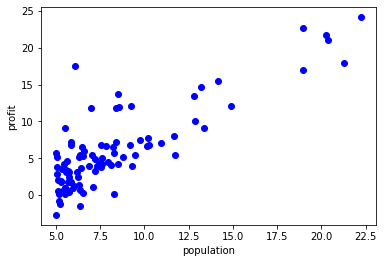

In [4]:


plt.close('all')


fig, ax = plt.subplots()
ltrd=ax.plot(X,y,'bo', label='Training data')
ax.set_xlabel('population')
ax.set_ylabel('profit')




Running Gradient Descent...

In [5]:

m=len(y) #  number of training data
size = 1
for dim in np.shape(X): size *= dim
n=size//m # training data dimension

# standardize training data shape   
X.shape = (m, n)

Xe=np.append(np.ones([m,1]),X, axis=1) # Add a column of ones to x

theta=np.zeros(n+1) # initialize fitting parameters
# Some gradient descent settings
lreg=ut.LReg()
iterations=1500
alpha=0.01

# 
theta, J_history = lreg.gradientDescent(Xe, y, theta, alpha, iterations)


print('Theta found by gradient descent: ')

print('{:0.5f},  {:0.5f}'.format(theta[0], theta[1]))



Theta found by gradient descent: 
-3.63029,  1.16636


Plot the the computed linear fit for the input training data

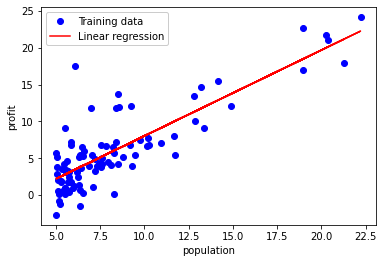

In [6]:
predicton=Xe@theta


fig, ax = plt.subplots()
ltrd=ax.plot(X,y,'bo', label='Training data')
ax.set_xlabel('population')
ax.set_ylabel('profit')

lregpl=ax.plot(X,predicton, '-r', label='Linear regression')
ax.legend(framealpha=1, frameon=True);




Visualizing J(theta_0, theta_1) ...

Text(0.5, 0, 'cost')

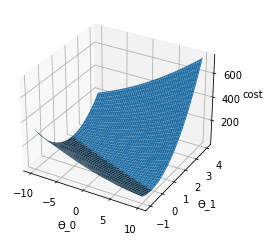

In [7]:


#  Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 110);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)]);


# Fill out J_vals
t=np.zeros(2)
for i in range(len(theta0_vals)):
    t[0]=theta0_vals[i]
    for j in  range(len(theta1_vals)):
        t[1]=theta1_vals[j]
        J_vals[i,j] = lreg.computeCost(Xe, y, t);
        
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(T0, T1, J_vals.T)
  
ax.set_xlabel('\u03F4_0')
ax.set_ylabel('\u03F4_1')
ax.set_zlabel('cost')      





## linear regression with multiple variables

In this part, we will implement linear regression with multiple variables to predict the prices of houses. Suppose we are selling our house and we want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file lreg_data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

Text(0, 0.5, 'Cost')

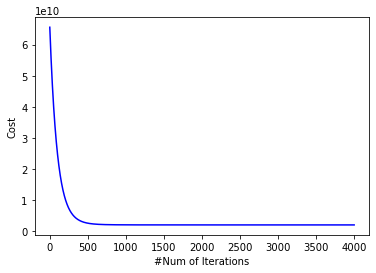

In [9]:
df=pd.read_csv('../data/lreg_data2.txt', names=['p1', 'p2','p3'])



data=df.values.astype(np.float64)

X=data[:,:-1]
y=data[:,-1]
m=len(y)

size = 1
for dim in np.shape(X): size *= dim
n=size//m

X.shape = (m, n)





## Feature Normalize

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [ ]:
X,mu,sigma = lreg.featureNormalize(X)

## Gradient Descent

Text(0, 0.5, 'Cost')

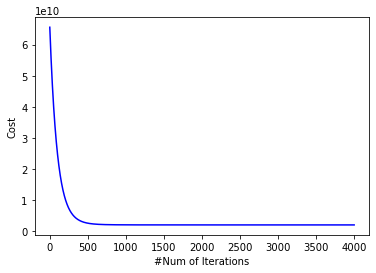

In [12]:
Xe=np.append(np.ones([m,1]), X, axis=1)
alpha = 0.005
num_iters = 4000

# Init Theta and Run Gradient Descent 
theta = np.zeros(n+1);
theta, J_history = lreg.gradientDescent(Xe, y, theta, alpha, num_iters);

fig, ax = plt.subplots()
ltrd=ax.plot(J_history,'b-', label='Cost History')
ax.set_xlabel('#Num of Iterations')
ax.set_ylabel('Cost') 

## Theoretical and Numerical Optimum Linear Regression

evaluating developed linear regression model on an input test data, and compare the output obtained by gradient descent algorithm with the one obtained theoretically.  

In [11]:
xtest=np.array([1650., 3.]) # example test data
# normalizing input test data using mean and variance values obtained using training data
xtestn=xtest-mu
xtestn=xtestn/sigma
xtestne=np.insert(xtestn, 0,1)


predict_price=xtestne.T@theta

print('lreg steepest descent preicted price is \n')

print('{:0.2f} \n'.format(predict_price))


theta_theo=lreg.normalEqn(Xe, y)

xteste=np.insert(xtest, 0,1)

theo_price=(xtestne.T@theta)

print('lreg theoretical preicted price is \n')

print('{:0.2f} \n'.format(theo_price))

lreg steepest descent preicted price is 

293083.37 

lreg theoretical preicted price is 

293083.37 



Seems like adaptive gradient descent algorithm output is the same with the theoretical one, at least up to two decimal points. good job GD :) 